In [226]:
from Beamformer_MVDR import beamformer_MVDR_FarField
import utils
# from acoular import MicGeom
import numpy as np
from scipy.io import wavfile
import os


LOOK_DIRECTION = 0
SAMPLING_RATE = 16000
FFT_LENGTH = 2048
FFT_SHIFT = 1024
SOUND_SPEED = 343
N = 4
ELEMENT_DISTANCE = 0.15/(N-1)
# ELEMENT_DISTANCE = 0.03

d = np.array([ELEMENT_DISTANCE]) * np.ones([N,1]) # sensor distance
n = np.arange(0,N,1).reshape([-1,1]) # N array from 0 to N-1

In [227]:
# get a, and s, then x
SIG_FREQ = 4000
SIG_DIRECTION = -45
WAVE_LENGTH = SOUND_SPEED / SIG_FREQ
print(f'Recommended element distance: {np.round(WAVE_LENGTH/2*100,2)}cm for a frequency at {SIG_FREQ}Hz')

SIG_DIRECTION2 = 45

a_sig = np.exp(1j * 2 * np.pi * np.sin(np.deg2rad(SIG_DIRECTION)) * n * d / WAVE_LENGTH)
a_sig2 = np.exp(1j * 2 * np.pi * np.sin(np.deg2rad(SIG_DIRECTION2)) * n * d / WAVE_LENGTH)

a_sig = a_sig + a_sig2

Rx = np.mat(1000 * np.dot(a_sig, np.transpose(np.conj(a_sig))) + 1 * np.eye(N)) # CSM

Recommended element distance: 4.29cm for a frequency at 4000Hz


In [228]:
# searching_angle_rad = np.deg2rad(np.arange(0, 360, 1).reshape([1, -1])) # every angle for filter curve
# mvdr_beamformer = beamformer_MVDR_FarField(MIC_ANGLE_VECTOR,
#                                            MIC_DIAMETER,
#                                            sampling_frequency=SAMPLING_RATE,
#                                            fft_length=FFT_LENGTH,
#                                            fft_shift=FFT_SHIFT)
# steering_vector = np.mat(mvdr_beamformer.get_single_steering_vector(LOOK_DIRECTION, SIG_FREQ))
# w = Rx.I * steering_vector / (steering_vector.H * Rx.I * steering_vector)
# B = mvdr_beamformer.get_single_filter(searching_angle_rad, w, SIG_FREQ)

In [229]:
theta = np.deg2rad(np.arange(-90, 90, 0.1).reshape([1, -1])) # every angle for filter curve
theta_0 = np.deg2rad(LOOK_DIRECTION)

a = np.mat(np.exp(1j * 2* np.pi * np.sin(theta) * n * d / WAVE_LENGTH)) # this is actually a set of unit signals coming from every direction, to calculate the filter curve later.
a_theta_0 = np.mat(np.exp(1j * 2* np.pi * np.sin(theta_0) * n * d / WAVE_LENGTH))
w = Rx.I * a_theta_0 / (a_theta_0.H * Rx.I * a_theta_0) # Rx.I is the inverse of itself. BTW, w is the weighting vector, the transfer function, the beamformer!
B = w.H * a
B = np.abs(B) / np.max(np.abs(B)) # normalization

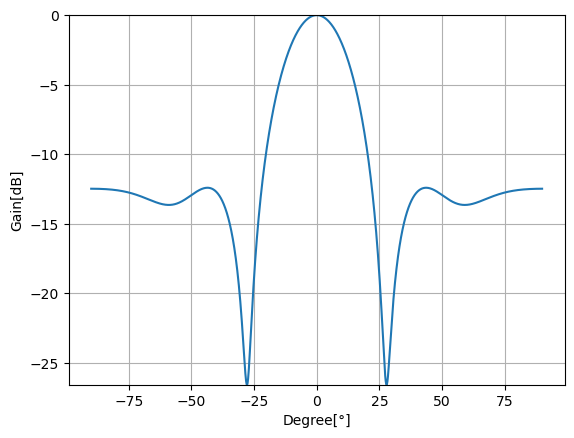

In [230]:
import matplotlib.pyplot as plt

# Define Data

x=np.arange(-90, 90, 0.1).reshape([-1])
y = []
for ele in np.arange(B.shape[1]):
    y.append(B[0,ele])
# Plot

plt.plot(x, 20 * np.log10(y))
plt.xlabel('Degree[°]')
plt.ylabel('Gain[dB]')
plt.ylim([min(20 * np.log10(y)),0])
plt.grid(True)
# Display

plt.show()

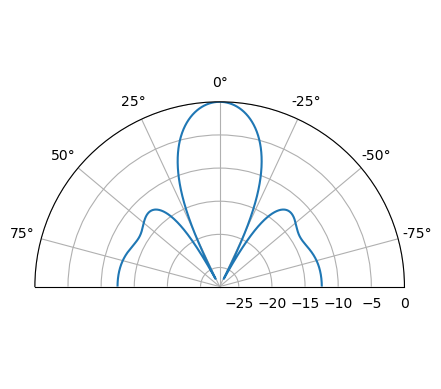

In [240]:
import numpy as np
import matplotlib.pyplot as plt


x=theta.reshape([-1])
y = []
for ele in np.arange(B.shape[1]):
    y.append(B[0,ele])

# fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# ax.plot(x, 20 * np.log10(y))
# ax.set_rmin(min(20 * np.log10(y)))
# ax.set_thetamin(-90)
# ax.set_thetamax(90)
# # ax.set_rticks([0.25, 0.5, 0.75, 1])  # Less radial ticks
# ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
# ax.grid(True)

# ax.set_title("A line plot on a polar axis", va='bottom')
# plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(x, 20 * np.log10(y))

ax.set_thetamin(-90)
ax.set_thetamax(90)
ax.set_theta_zero_location("N")

# label_position=ax.get_rlabel_position()
# ax.text(np.radians(label_position),ax.get_rmax()/2.,'My label',
#         rotation=label_position,ha='center',va='center')
        
plt.savefig("polar_coordinates_01.svg", bbox_inches='tight', format='svg')

plt.show()

In [232]:
# multi_signal = multi_channel_read()
# complex_spectrum = utils.get_spectrogram(multi_signal, FFT_LENGTH, FFT_SHIFT, FFT_LENGTH)
# mvdr_beamformer = beamformer_MVDR_FarField(MIC_ANGLE_VECTOR,
#                                            MIC_DIAMETER,
#                                            sampling_frequency=SAMPLING_RATE,
#                                            fft_length=FFT_LENGTH,
#                                            fft_shift=FFT_SHIFT)
# steering_vector = mvdr_beamformer.get_sterring_vector(LOOK_DIRECTION)
# spatial_correlation_matrix = mvdr_beamformer.get_spatial_correlation_matrix(multi_signal)
# beamformer = mvdr_beamformer.get_mvdr_beamformer(steering_vector, spatial_correlation_matrix)
# enhanced_spectrum = mvdr_beamformer.apply_beamformer(beamformer, complex_spectrum)

In [233]:
# enhanced_audio = enhanced_spectrum
# enhanced_audio = enhanced_audio / np.max(np.abs(enhanced_audio)) * 0.7
# OUTPUT_FILENAME = f'./test_{LOOK_DIRECTION}.wav'
# wavfile.write(OUTPUT_FILENAME, SAMPLING_RATE, enhanced_audio.astype(np.float32))